In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

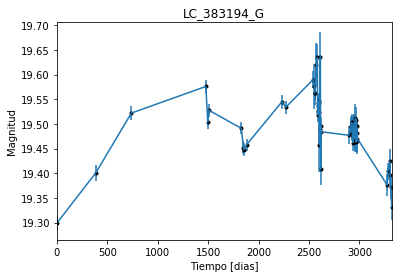

In [2]:
data = np.genfromtxt('LC_383194_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_383194_G')
plt.savefig("LC_383194_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

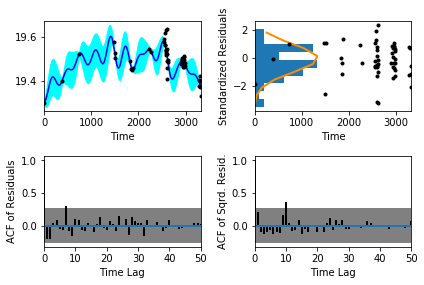

In [5]:
sample.assess_fit()

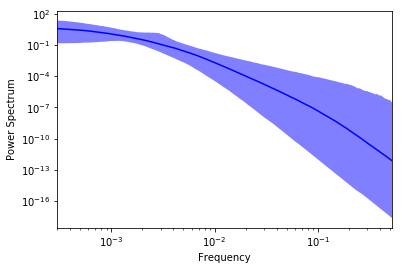

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

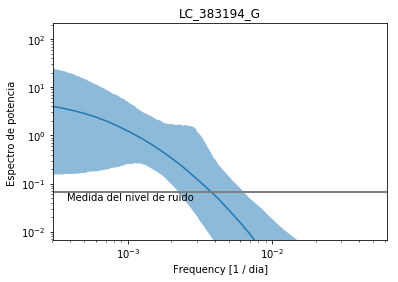

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_383194_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_383194_G')

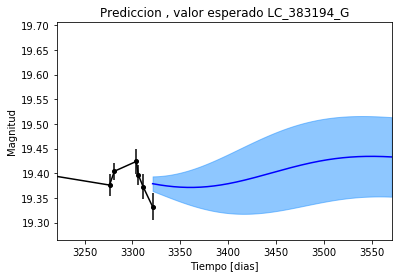

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_383194_G')

Text(0.5,1,'Prediccion, Caminos simulados_LC_383194_G')

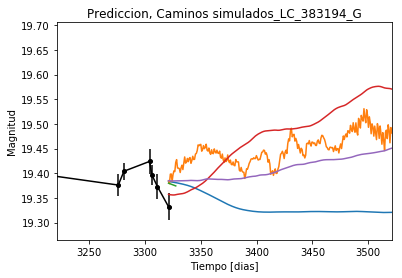

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_383194_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


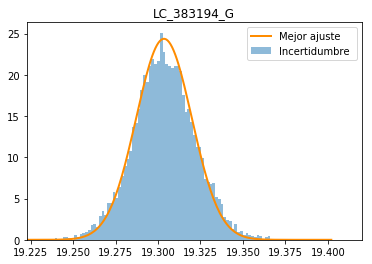

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_383194_G')
plt.savefig("Mejor_ajuste_LC_383194_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_383194_G')

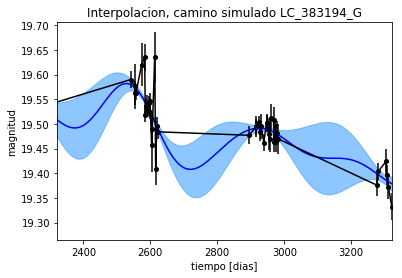

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_383194_G')

Text(0.5,1,'Interpolacion, camino simulado LC_383194_G')

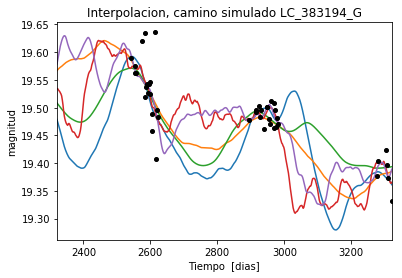

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_383194_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 821.197631232
Median: 0.0129909191632
Standard deviation: 0.216414822789
68% credibility interval: [ 0.00110251  0.22710588]
95% credibility interval: [  3.60333082e-04   8.50057797e-01]
99% credibility interval: [  3.16958508e-04   1.00515158e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1067.27879981
Median: 0.00190882181931
Standard deviation: 0.0624412437827
68% credibility interval: [ 0.00046152  0.02183699]
95% credibility interval: [ 0.00032176  0.17451809]
99% credibility interval: [  3.06301989e-04   4.67631234e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 815.383367812
Median: 0.0175223032381
Standard 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1203.12727316
Median: 125.64601555
Standard deviation: 1.64012032319
68% credibility interval: [ 123.81674878  126.87997087]
95% credibility interval: [ 121.30966279  127.51945451]
99% credibility interval: [ 119.41805507  128.08617798]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 623.0585841
Median: 0.792474205669
Standard deviation: 2.19064430543
68% credibility interval: [ 0.06998895  4.03234321]
95% credibility interval: [ 0.01580525  7.363716  ]
99% credibility interval: [ 0.01005986  9.77888813]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 661.170948948
Median: 0.297777236187
Standard deviation: 7.36717151559
68% credibility interval: [ 0.00835553  5.6483087 ]
95% credibility interval: [  5.77015411e-04 

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 354.772193468
Median: 9.71451744875e-49
Standard deviation: 1.20585311513e+113
68% credibility interval: [  1.64807444e-104   2.90152975e-001]
95% credibility interval: [  3.86314415e-181   1.23717810e+102]
99% credibility interval: [  2.06960692e-195   2.54938487e+113]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1751.32375758
Median: 19.4643475612
Standard deviation: 0.0487830284108
68% credibility interval: [ 19.4199224   19.50004955]
95% credibility interval: [ 19.35663873  19.5504586 ]
99% credibility interval: [ 19.29623448  19.62003739]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 336.109005021
Median: 0.00181081755554
Standard deviation: 0.212059055325
68% credibility interval: [ 0.          0.21531719]
95% credibility interval: [ 0.         0.8115911]
99% credibility interval: [ 0.          0.99293989]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 336.109005021
Median: 0.00181081755554
Standard deviation: 0.212059055325
68% credibility interval: [ 0.          0.21531719]
95% credibility interval: [ 0.         0.8115911]
99% credibility interval: [ 0.          0.99293989]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1050.34786376
Median: 0.0
Standard deviation: 0.00059699227778
68% credi

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1203.12727316
Median: 125.64601555
Standard deviation: 1.64012032319
68% credibility interval: [ 123.81674878  126.87997087]
95% credibility interval: [ 121.30966279  127.51945451]
99% credibility interval: [ 119.41805507  128.08617798]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1757.78696238
Median: 0.00895953530121
Standard deviation: 0.0117955923888
68% credibility interval: [ 0.00548773  0.01673014]
95% credibility interval: [ 0.00346236  0.03980375]
99% credibility interval: [ 0.00275959  0.07832744]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1676.44370846
Median: 1.2389774026
Standard deviation: 0.197371640405
68% credibility interval: [ 1.06694593  1.45205508]
95% credibility interval: [ 0.92740295  1.68936766]
99% credibility interval: [ 0.8459287   1.85844382]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 781.028150515
Median: 5.0743140552e-05
Standard deviation: 0.0458915832489
68% credibility interval: [  1.65184254e-07   1.93623023e-03]
95% credibility interval: [  4.82659608e-107   5.02900214e-002]
99% credibility interval: [  3.20049247e-118   2.32715565e-001]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 821.197631232
Median: (-0.0816243524127-1.35351981439j)
Standard deviation: 1.90375764482
68% credibility interval: [-1.42694833+0.j         -0.00692728-2.43452108j]
95% credibility interval: [ -5.34107066e+00+0.j          -2.26403953e-03-5.24245631j]
99% credibility interval: [ -6.31555367e+00+0.j          -1.99150904e-03-4.62565771j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1067.27879981
Median: (-0.0119934812091+0j)
Standard deviation: 1.38896703036
68% credibility interval: [-0.13720586+0.28589237j -0.00289984+0.j        ]
95% credibility interval: [-1.09652948+0.j -0.00202170+0.j]
99% credibility interval: [ -2.93821370e+00+3.62893504j  -1.92455215e-03+0.j        ]
Posterior summary for parameter ar_roots  